In [ ]:
# Import Dependencies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [240]:
# read xlsx file 

xl_file = pd.ExcelFile('Data Analyst Homework Queestions.xlsx')

dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}

In [241]:
# loop to get values from the dictionary

values = []

for value in dfs.values():
    values.append(value)

In [242]:
# extract values into dataframe
data = values[0]
data.tail()

,Site,Month of Date Id,Day of Date Id,Year of Date Id,Measure Names,Person Type,Supplier Type,Measure Values
7723,Site B,May,29,2017,Transactional Sales,PM,Platform,3979.354081
7724,Site A,May,30,2017,Transactional Sales,PM,Platform,21401.570207
7725,Site B,May,30,2017,Transactional Sales,PM,Platform,3941.968893
7726,Site A,May,31,2017,Transactional Sales,PM,Platform,18928.767438
7727,Site B,May,31,2017,Transactional Sales,PM,Platform,3385.404582


In [243]:
# data.columns = ['site', 'month_of_date_id', 'day_of_date_id', 'year_of_date_id', 'measure_names',
#                 'person_type', 'supplier_type', 'measure_values']

In [244]:
data.head()

,Site,Month of Date Id,Day of Date Id,Year of Date Id,Measure Names,Person Type,Supplier Type,Measure Values
0,Site A,July,1,2016,Gross Booking Value,FRBO,Platform,248718.800525
1,Site B,July,1,2016,Gross Booking Value,FRBO,Platform,154181.627170
2,Site A,July,2,2016,Gross Booking Value,FRBO,Platform,178238.115019
3,Site B,July,2,2016,Gross Booking Value,FRBO,Platform,162374.325731
4,Site A,July,3,2016,Gross Booking Value,FRBO,Platform,222340.192845


In [245]:
# data.to_csv('home_away_data.csv', index = False)

In [246]:
# df = pd.read_csv('home_away_data.csv')
# df.head()

In [247]:
data.isnull().values.any()

False

In [248]:
# find unique entries in 'measure names' columns 
for x in data['Measure Names'].unique():
    print(x)

Gross Booking Value
Inquiries
Property Detail Page Views
Total Cancellations
Total Gross Bookings
Total Net Bookings
Transactional Sales


1.  What is booking conversion and inquiry conversion for each site?  
2. How do they compare year-over-year and to each other? 
3. How does it compare between owner type and supplier type?  
4. What do you think we could do to move travelers from inquiries to bookings?

In [249]:
# Get 2016 and 2017 years data
data_2016 = data.loc[data['Year of Date Id'] == 2016]
data_2017 = data.loc[data['Year of Date Id'] == 2017]

## What is booking conversion and inquiry conversion for each site?

In [250]:
data_site_A = data.loc[data['Site'] == 'Site A']
data_site_B = data.loc[data['Site'] == 'Site B']

In [251]:
data_site_A_booking = data_site_A.loc[data_site_A['Measure Names'] == 'Total Net Bookings']
data_site_B_booking = data_site_B.loc[data_site_B['Measure Names'] == 'Total Net Bookings']

data_site_A_inquiry = data_site_A.loc[data_site_A['Measure Names'] == 'Inquiries']
data_site_B_inquiry = data_site_B.loc[data_site_B['Measure Names'] == 'Inquiries']



In [252]:
bc_data_site_A_booking= round(data_site_A_booking['Measure Values'].sum()/len(data_site_A_booking),0)
bc_data_site_B_booking= round(data_site_B_booking['Measure Values'].sum()/len(data_site_B_booking),0)

in_data_site_A_inquiry= round(data_site_A_inquiry['Measure Values'].sum()/len(data_site_A_inquiry),0)
in_data_site_B_inquiry= round(data_site_B_inquiry['Measure Values'].sum()/len(data_site_B_inquiry),0)


In [253]:
percent_A = round((bc_data_site_A_booking / in_data_site_A_inquiry)*100,2)
percent_B = round((bc_data_site_B_booking / in_data_site_B_inquiry)*100,2)

In [254]:
data_site_A_B = pd.DataFrame(
        {'Booking Conversion': [bc_data_site_A_booking, bc_data_site_B_booking], 
         'Inquiry Conversion': [in_data_site_A_inquiry, in_data_site_B_inquiry],
        'Percent': [percent_A, percent_B]}, 
    
    index=['Site A', 'Site B'])

In [255]:
data_site_A_B

,Booking Conversion,Inquiry Conversion,Percent
Site A,135.0,1546.0,8.73
Site B,75.0,1640.0,4.57


In [256]:
data_site_A_B['Percent']

Site A    8.73
Site B    4.57
Name: Percent, dtype: float64

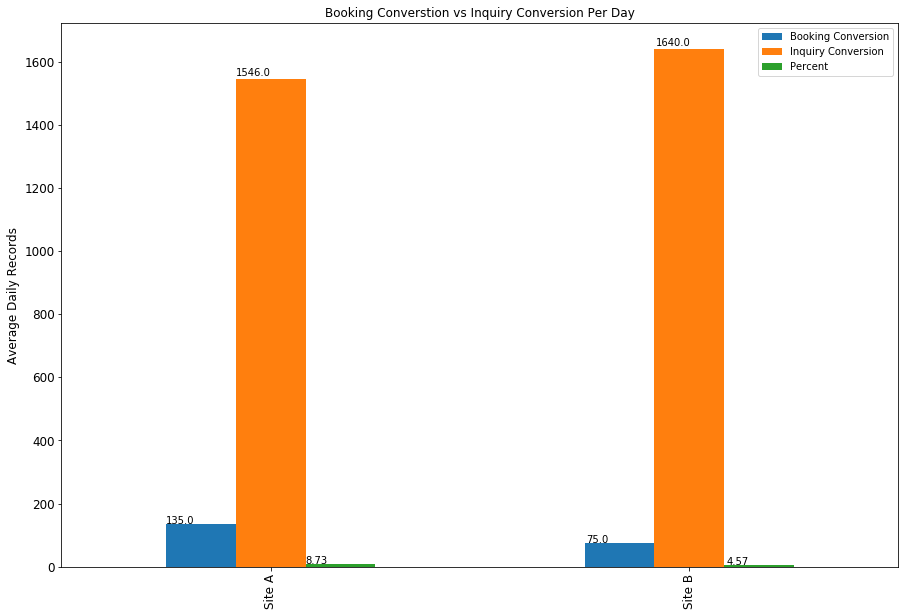

In [257]:
ax = data_site_A_B[['Booking Conversion','Inquiry Conversion', 'Percent']].plot(kind='bar', 
            title ="Booking Converstion vs Inquiry Conversion Per Day", figsize=(15, 10), legend=True, fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_ylabel("Average Daily Records", fontsize=12)

plt.savefig('q1a1.png')

plt.show()

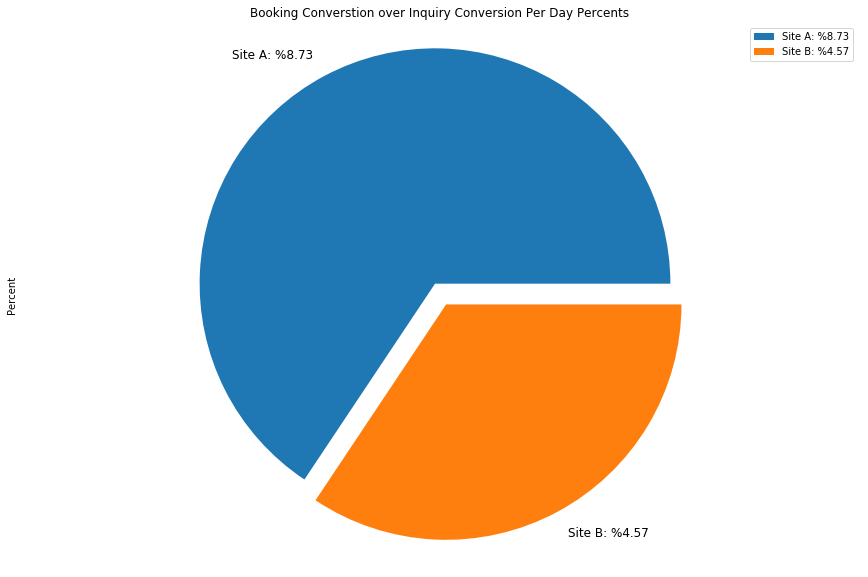

In [258]:
names = ['Site A: %8.73', 'Site B: %4.57']

explode = (0, 0.1)
ax_pie = data_site_A_B['Percent'].plot(kind='pie', 
            title ="Booking Converstion over Inquiry Conversion Per Day Percents", 
                                       labels= names, figsize=(15, 10), explode = explode, legend=True, fontsize=12)
ax_pie.axis('equal')


plt.savefig('q1a1_percent.png')
plt.show()

## How do they compare year-over-year and to each other? 


In [259]:
# get site A and B data for each year 2016 and 2017
data_2016_site_A = data_2016.loc[data_2016['Site'] == 'Site A']
data_2016_site_B = data_2016.loc[data_2016['Site'] == 'Site B']

data_2017_site_A = data_2017.loc[data_2017['Site'] == 'Site A']
data_2017_site_B = data_2017.loc[data_2017['Site'] == 'Site B']

In [260]:
# 2016 and 2017 data for 'booking conversion' and 'inquiries conversion' as bk for site A and site B

data_2016_site_A_booking = data_2016_site_A.loc[data_2016_site_A['Measure Names'] == 'Total Net Bookings']
data_2016_site_B_booking = data_2016_site_B.loc[data_2016_site_B['Measure Names'] == 'Total Net Bookings']

data_2017_site_A_booking = data_2017_site_A.loc[data_2017_site_A['Measure Names'] == 'Total Net Bookings']
data_2017_site_B_booking = data_2017_site_B.loc[data_2017_site_B['Measure Names'] == 'Total Net Bookings']

data_2016_site_A_inquiry = data_2016_site_A.loc[data_2016_site_A['Measure Names'] == 'Inquiries']
data_2016_site_B_inquiry = data_2016_site_B.loc[data_2016_site_B['Measure Names'] == 'Inquiries']

data_2017_site_A_inquiry = data_2017_site_A.loc[data_2017_site_A['Measure Names'] == 'Inquiries']
data_2017_site_B_inquiry = data_2017_site_B.loc[data_2017_site_B['Measure Names'] == 'Inquiries']

In [261]:
bc_data_2016_site_A= round(data_2016_site_A_booking['Measure Values'].sum()/len(data_2016_site_A_booking),0)
bc_data_2016_site_B= round(data_2016_site_B_booking['Measure Values'].sum()/len(data_2016_site_B_booking),0)

bc_data_2017_site_A= round(data_2017_site_A_booking['Measure Values'].sum()/len(data_2017_site_A_booking),0)
bc_data_2017_site_B= round(data_2017_site_B_booking['Measure Values'].sum()/len(data_2017_site_B_booking),0)

in_data_2016_site_A= round(data_2016_site_A_inquiry['Measure Values'].sum()/len(data_2016_site_A_inquiry),0)
in_data_2016_site_B= round(data_2016_site_B_inquiry['Measure Values'].sum()/len(data_2016_site_B_inquiry),0)

in_data_2017_site_A= round(data_2017_site_A_inquiry['Measure Values'].sum()/len(data_2017_site_A_inquiry),0)
in_data_2017_site_B= round(data_2017_site_B_inquiry['Measure Values'].sum()/len(data_2017_site_B_inquiry),0)

percent_16_A = round((bc_data_2016_site_A / in_data_2016_site_A)*100,2)
percent_17_A = round((bc_data_2017_site_A / in_data_2017_site_A)*100,2)


percent_16_B = round((bc_data_2016_site_B / in_data_2016_site_B)*100,2)
percent_17_B = round((bc_data_2017_site_B / in_data_2017_site_B)*100,2)

In [262]:
data_site_years = pd.DataFrame(
        {'Booking Conversion': [bc_data_2016_site_A, bc_data_2016_site_B, bc_data_2017_site_A, bc_data_2017_site_B], 
         'Inquiry Conversion': [in_data_2016_site_A, in_data_2016_site_B, in_data_2017_site_A, in_data_2017_site_B],
        'Percent': [percent_16_A, percent_16_B, percent_17_A, percent_17_B]}, 
            index=['Site A 2016', 'Site B 2016', 'Site A 2017', 'Site B 2017'])

In [263]:
data_site_years

,Booking Conversion,Inquiry Conversion,Percent
Site A 2016,104.0,1687.0,6.16
Site B 2016,79.0,2234.0,3.54
Site A 2017,166.0,1405.0,11.81
Site B 2017,72.0,1045.0,6.89


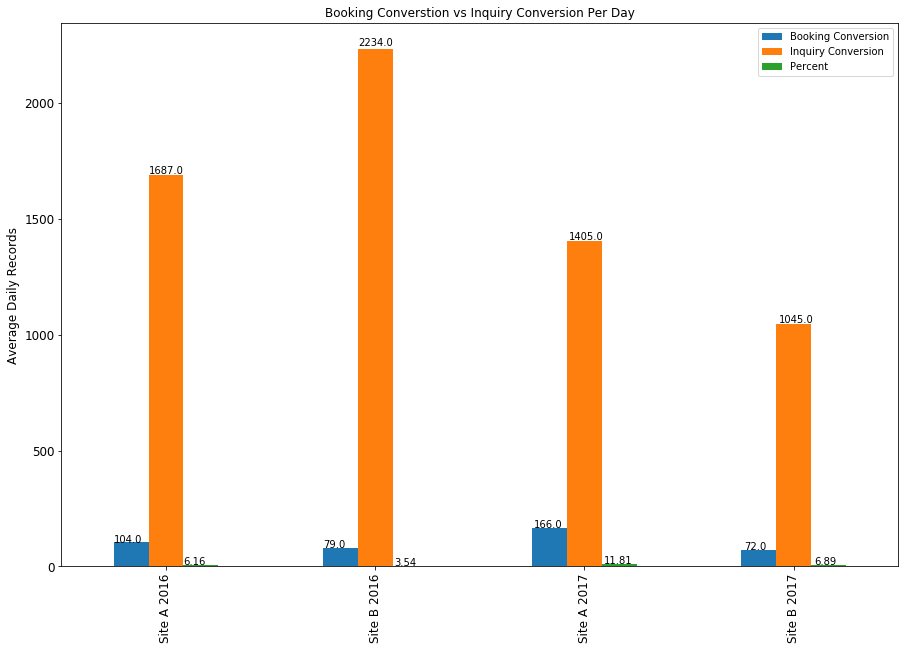

In [264]:
ax = data_site_years[['Booking Conversion','Inquiry Conversion', 'Percent']].plot(kind='bar', 
            title ="Booking Converstion vs Inquiry Conversion Per Day", figsize=(15, 10), legend=True, fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_ylabel("Average Daily Records", fontsize=12)

plt.savefig('q1a2.png')

plt.show()

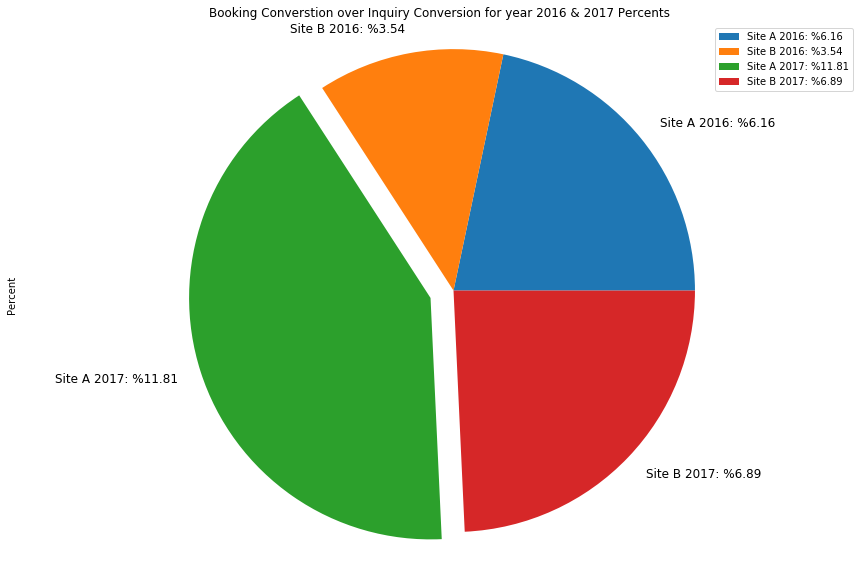

In [265]:
names = ['Site A 2016: %6.16', 'Site B 2016: %3.54', 'Site A 2017: %11.81', 'Site B 2017: %6.89']

explode  = (0, 0, 0.1, 0)
ax_pie = data_site_years['Percent'].plot(kind='pie', 
            title ="Booking Converstion over Inquiry Conversion for year 2016 & 2017 Percents", 
                                       labels= names, figsize=(15, 10), explode=explode, legend=True, fontsize=12)
ax_pie.axis('equal')

plt.savefig('q1a2_percent.png')
plt.show()

## How does it compare between owner type and supplier type?

In [266]:
data_site_A.head()

,Site,Month of Date Id,Day of Date Id,Year of Date Id,Measure Names,Person Type,Supplier Type,Measure Values
0,Site A,July,1,2016,Gross Booking Value,FRBO,Platform,248718.800525
2,Site A,July,2,2016,Gross Booking Value,FRBO,Platform,178238.115019
4,Site A,July,3,2016,Gross Booking Value,FRBO,Platform,222340.192845
6,Site A,July,4,2016,Gross Booking Value,FRBO,Platform,263738.684559
8,Site A,July,5,2016,Gross Booking Value,FRBO,Platform,227015.394658


In [267]:
# find unique entries in 'measure names' columns 
for x in data['Person Type'].unique():
    print(x)

FRBO
PM


In [268]:
# find unique entries in 'measure names' columns 
for x in data['Supplier Type'].unique():
    print(x)

Platform
Integrated


In [269]:
data_site_B.head()

,Site,Month of Date Id,Day of Date Id,Year of Date Id,Measure Names,Person Type,Supplier Type,Measure Values
1,Site B,July,1,2016,Gross Booking Value,FRBO,Platform,154181.627170
3,Site B,July,2,2016,Gross Booking Value,FRBO,Platform,162374.325731
5,Site B,July,3,2016,Gross Booking Value,FRBO,Platform,173918.900182
7,Site B,July,4,2016,Gross Booking Value,FRBO,Platform,206100.786083
9,Site B,July,5,2016,Gross Booking Value,FRBO,Platform,196755.742628


In [270]:
# Booking Converstion based on PERSON TYPE and Supplier Type 
# Total Net Bookings
# FRBO

data_site_A_frbo = data_site_A.loc[(data_site_A["Measure Names"] == "Total Net Bookings") &
                                            (data_site_A["Person Type"] == "FRBO")]

data_site_B_frbo = data_site_B.loc[(data_site_B["Measure Names"] == "Total Net Bookings") &
                                            (data_site_B["Person Type"] == "FRBO")]

# PM
data_site_A_pm = data_site_A.loc[(data_site_A["Measure Names"] == "Total Net Bookings") &
                                            (data_site_A["Person Type"] == "PM")]

data_site_B_pm = data_site_B.loc[(data_site_B["Measure Names"] == "Total Net Bookings") &
                                            (data_site_B["Person Type"] == "PM")]

# Integrated
# FRBO

data_site_A_frbo_inq = data_site_A.loc[(data_site_A["Measure Names"] == "Inquiries") &
                                            (data_site_A["Person Type"] == "FRBO")]

data_site_B_frbo_inq = data_site_B.loc[(data_site_B["Measure Names"] == "Inquiries") &
                                            (data_site_B["Person Type"] == "FRBO")]

# PM
data_site_A_pm_inq = data_site_A.loc[(data_site_A["Measure Names"] == "Inquiries") &
                                            (data_site_A["Person Type"] == "PM")]

data_site_B_pm_inq = data_site_B.loc[(data_site_B["Measure Names"] == "Inquiries") &
                                            (data_site_B["Person Type"] == "PM")]

In [271]:
data_site_A_frbo_tnb = data_site_A_frbo['Measure Values'].sum()
data_site_B_frbo_tnb = data_site_B_frbo['Measure Values'].sum()

data_site_A_pm_tnb = data_site_A_pm['Measure Values'].sum()
data_site_B_pm_tnb = data_site_B_pm['Measure Values'].sum()


data_site_A_frbo_inqu = data_site_A_frbo_inq['Measure Values'].sum()
data_site_B_frbo_inqu = data_site_B_frbo_inq['Measure Values'].sum()

data_site_A_pm_inqu = data_site_A_pm_inq['Measure Values'].sum()
data_site_B_pm_inqu = data_site_B_pm_inq['Measure Values'].sum()

percent_A_frbo = round((data_site_A_frbo_tnb/data_site_A_frbo_inqu)*100,2)
percent_B_frbo = round((data_site_B_frbo_tnb/data_site_B_frbo_inqu)*100,2)

percent_A_pm = round((data_site_A_pm_tnb/data_site_A_pm_inqu)*100,2)
percent_B_pm = round((data_site_B_pm_tnb/data_site_B_pm_inqu)*100,2)

In [272]:
percent_B_pm

3.77

In [273]:
data_site_owner_type = pd.DataFrame(
        {'Booking Conversion': [data_site_A_frbo_tnb, data_site_A_pm_tnb, data_site_B_frbo_tnb, data_site_B_pm_tnb], 
         'Inquiry Conversion': [data_site_A_frbo_inqu, data_site_A_pm_inqu, data_site_B_frbo_inqu, data_site_B_pm_inqu],
        'Percent': [percent_A_frbo, percent_A_pm, percent_B_frbo, percent_B_pm]}, 
            index=['Site A FRBO', 'Site A PM', 'Site B FRBO', 'Site B PM'])

In [274]:
data_site_owner_type

,Booking Conversion,Inquiry Conversion,Percent
Site A FRBO,44368.0,421061.0,10.54
Site A PM,30300.0,432181.0,7.01
Site B FRBO,29869.0,593512.0,5.03
Site B PM,11756.0,311706.0,3.77


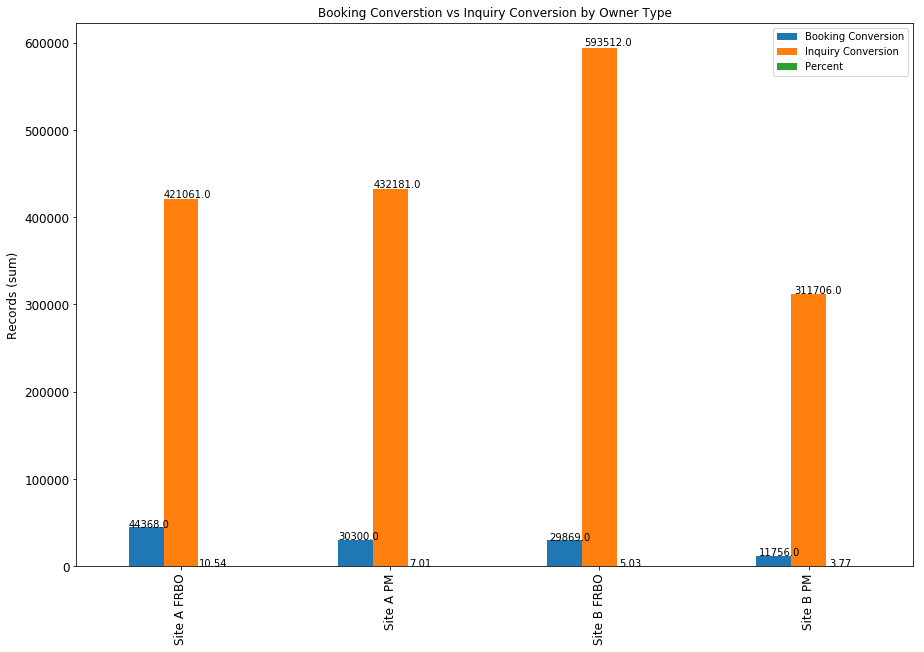

In [275]:
ax = data_site_owner_type[['Booking Conversion','Inquiry Conversion', 'Percent']].plot(kind='bar', 
            title ="Booking Converstion vs Inquiry Conversion by Owner Type", figsize=(15, 10), legend=True, fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_ylabel("Records (sum)", fontsize=12)

plt.savefig('q1a3.png')

plt.show()

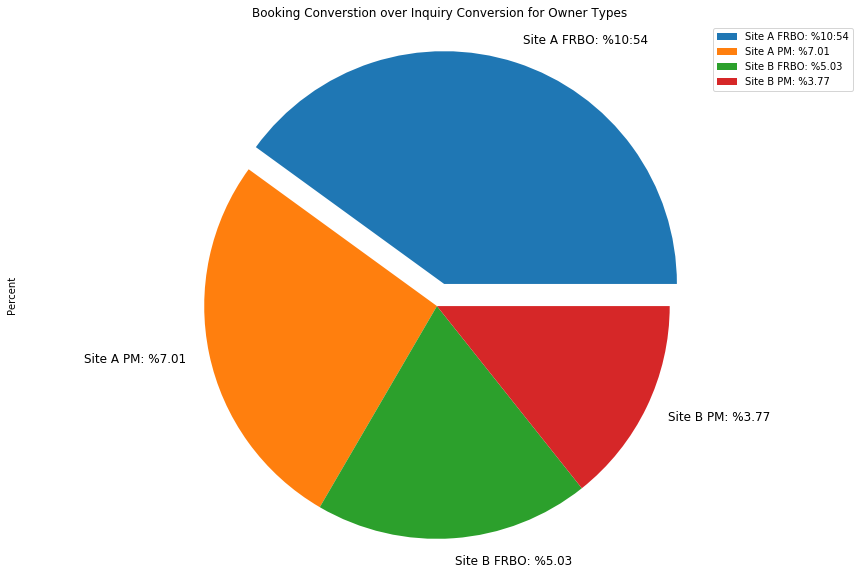

In [276]:
names = ['Site A FRBO: %10:54', 'Site A PM: %7.01', 'Site B FRBO: %5.03', 'Site B PM: %3.77']

explode  = (0.1, 0, 0, 0)
ax_pie = data_site_owner_type['Percent'].plot(kind='pie', 
            title ="Booking Converstion over Inquiry Conversion for Owner Types", 
                                       labels= names, figsize=(15, 10), explode=explode, legend=True, fontsize=12)
ax_pie.axis('equal')

plt.savefig('q1a3_percent.png')
plt.show()

In [277]:
# Booking Converstion based on PERSON TYPE and Supplier Type 
# Total Net Bookings
# Platform

data_site_A_tnb_plat = data_site_A.loc[(data_site_A["Measure Names"] == "Total Net Bookings") &
                                            (data_site_A["Supplier Type"] == "Platform")]

data_site_B_tnb_plat = data_site_B.loc[(data_site_B["Measure Names"] == "Total Net Bookings") &
                                            (data_site_B["Supplier Type"] == "Platform")]

# Integrated
data_site_A_tnb_int = data_site_A.loc[(data_site_A["Measure Names"] == "Total Net Bookings") &
                                            (data_site_A["Supplier Type"] == "Integrated")]

data_site_B_tnb_int = data_site_B.loc[(data_site_B["Measure Names"] == "Total Net Bookings") &
                                            (data_site_B["Supplier Type"] == "Integrated")]


# Inquiries

# Platform

data_site_A_inq_plat = data_site_A.loc[(data_site_A["Measure Names"] == "Inquiries") &
                                            (data_site_A["Supplier Type"] == "Platform")]

data_site_B_inq_plat = data_site_B.loc[(data_site_B["Measure Names"] == "Inquiries") &
                                            (data_site_B["Supplier Type"] == "Platform")]

# Integrated
data_site_A_inq_int = data_site_A.loc[(data_site_A["Measure Names"] == "Inquiries") &
                                            (data_site_A["Supplier Type"] == "Integrated")]

data_site_B_inq_int = data_site_B.loc[(data_site_B["Measure Names"] == "Inquiries") &
                                            (data_site_B["Supplier Type"] == "Integrated")]

In [278]:
data_site_A_tnb_plat_sum = data_site_A_tnb_plat['Measure Values'].sum()
data_site_B_tnb_plat_sum = data_site_B_tnb_plat['Measure Values'].sum()

data_site_A_tnb_int_sum = data_site_A_tnb_int['Measure Values'].sum()
data_site_B_tnb_int_sum = data_site_B_tnb_int['Measure Values'].sum()

data_site_A_inq_plat_sum = data_site_A_inq_plat['Measure Values'].sum()
data_site_B_inq_plat_sum = data_site_B_inq_plat['Measure Values'].sum()

data_site_A_inq_int_sum = data_site_A_inq_int['Measure Values'].sum()
data_site_B_inq_int_sum = data_site_B_inq_int['Measure Values'].sum()


percent_A_plat = round((data_site_A_tnb_plat_sum/data_site_A_inq_plat_sum)*100,2)
percent_B_plat = round((data_site_B_tnb_plat_sum/data_site_B_inq_plat_sum)*100,2)

percent_A_int = round((data_site_A_tnb_int_sum/data_site_A_inq_int_sum)*100,2)
percent_B_int = round((data_site_B_tnb_int_sum/data_site_B_inq_int_sum)*100,2)

In [279]:
data_site_supplier = pd.DataFrame(
        {'Booking Conversion': [data_site_A_tnb_plat_sum, data_site_A_tnb_int_sum, data_site_B_tnb_plat_sum, data_site_B_tnb_int_sum], 
         'Inquiry Conversion': [data_site_A_inq_plat_sum, data_site_A_inq_int_sum, data_site_B_inq_plat_sum, data_site_B_inq_int_sum],
        'Percent': [percent_A_plat, percent_A_int, percent_B_plat, percent_B_int]}, 
            index=['Site A Platfrom', 'Site A Integrated', 'Site B Platfrom', 'Site B Integrated'])

In [280]:
data_site_supplier

,Booking Conversion,Inquiry Conversion,Percent
Site A Platfrom,64829.0,754966.0,8.59
Site A Integrated,9839.0,98276.0,10.01
Site B Platfrom,38011.0,849401.0,4.48
Site B Integrated,3614.0,55817.0,6.47


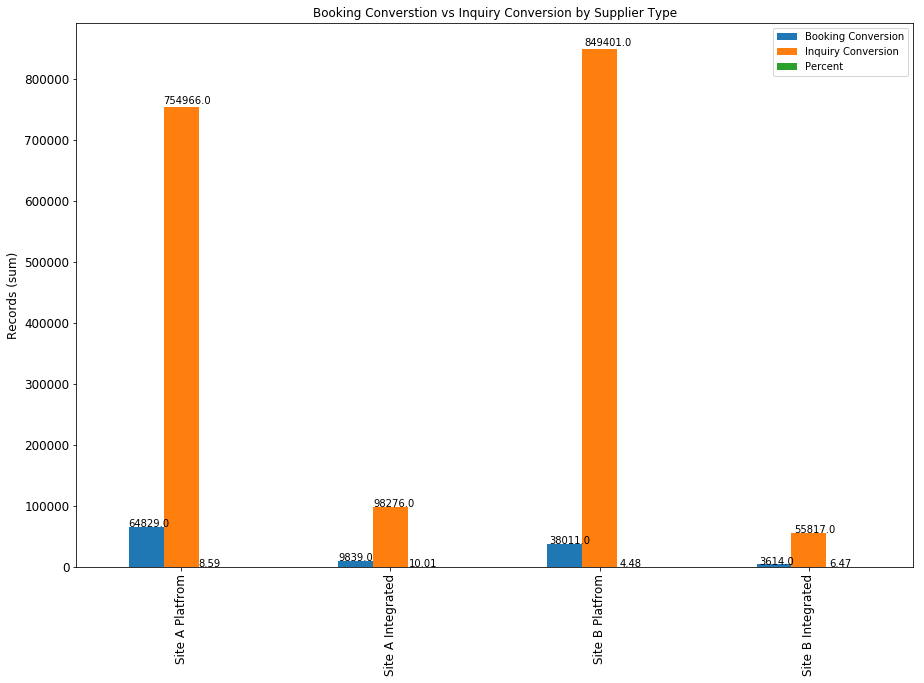

In [281]:
ax = data_site_supplier[['Booking Conversion','Inquiry Conversion', 'Percent']].plot(kind='bar', 
            title ="Booking Converstion vs Inquiry Conversion by Supplier Type", figsize=(15, 10), legend=True, fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_ylabel("Records (sum)", fontsize=12)

plt.savefig('q1a4.png')

plt.show()

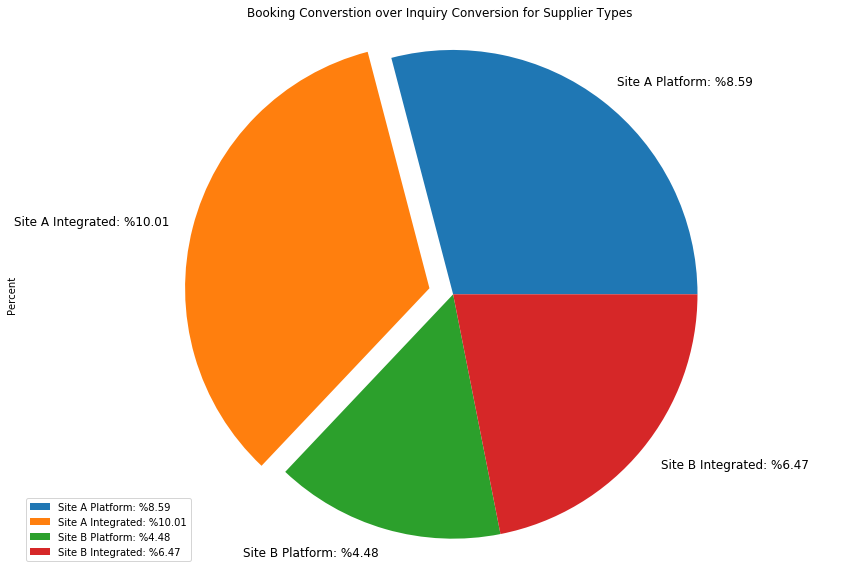

In [282]:
names = ['Site A Platform: %8.59', 'Site A Integrated: %10.01', 'Site B Platform: %4.48', 'Site B Integrated: %6.47']

explode  = (0, 0.1, 0, 0)
ax_pie = data_site_supplier['Percent'].plot(kind='pie', 
            title ="Booking Converstion over Inquiry Conversion for Supplier Types", 
                                       labels= names, figsize=(15, 10), explode=explode, legend=True, fontsize=12)
ax_pie.axis('equal')

plt.savefig('q1a4_percent.png')
plt.show()

1. What is the cancellation rate of each brand and how do they compare? 
2. How did they change year-over-year?
3. How does it compare between owner type and supplier type? 
4. How could we try to decrease the cancellation rate?

## What is the cancellation rate of each brand and how do they compare? 

In [283]:
data_site_A.head()

,Site,Month of Date Id,Day of Date Id,Year of Date Id,Measure Names,Person Type,Supplier Type,Measure Values
0,Site A,July,1,2016,Gross Booking Value,FRBO,Platform,248718.800525
2,Site A,July,2,2016,Gross Booking Value,FRBO,Platform,178238.115019
4,Site A,July,3,2016,Gross Booking Value,FRBO,Platform,222340.192845
6,Site A,July,4,2016,Gross Booking Value,FRBO,Platform,263738.684559
8,Site A,July,5,2016,Gross Booking Value,FRBO,Platform,227015.394658


In [284]:
for x in data_site_A['Supplier Type'].unique():
    print(x)

Platform
Integrated


In [285]:
site_A_cancellation = data.loc[(data["Site"] == "Site A") &
                                            (data["Measure Names"] == "Total Cancellations")]
site_B_cancellation = data.loc[(data["Site"] == "Site B") &
                                            (data["Measure Names"] == "Total Cancellations")]


site_A_booking = data.loc[(data["Site"] == "Site A") &
                                            (data["Measure Names"] == "Total Net Bookings")]
site_B_booking = data.loc[(data["Site"] == "Site B") &
                                            (data["Measure Names"] == "Total Net Bookings")]


In [286]:
site_A_cancellation_sum = site_A_cancellation['Measure Values'].sum()
site_B_cancellation_sum = site_B_cancellation['Measure Values'].sum()
site_A_booking_sum = site_A_booking['Measure Values'].sum()
site_B_booking_sum = site_B_booking['Measure Values'].sum()

site_A_percent = round((site_A_cancellation_sum/site_A_booking_sum)*100,2)
site_B_percent = round((site_B_cancellation_sum/site_B_booking_sum)*100,2)

In [287]:
data_cancellations = pd.DataFrame(
        {'Cancellation': [site_A_cancellation_sum, site_B_cancellation_sum], 
         'Booking Conversion': [site_A_booking_sum, site_B_booking_sum],
        'Cancellation Rate': [site_A_percent, site_B_percent]}, 
            index=['Site A', 'Site B'])

In [288]:
data_cancellations

,Booking Conversion,Cancellation,Cancellation Rate
Site A,74668.0,14783.0,19.80
Site B,41625.0,8959.0,21.52


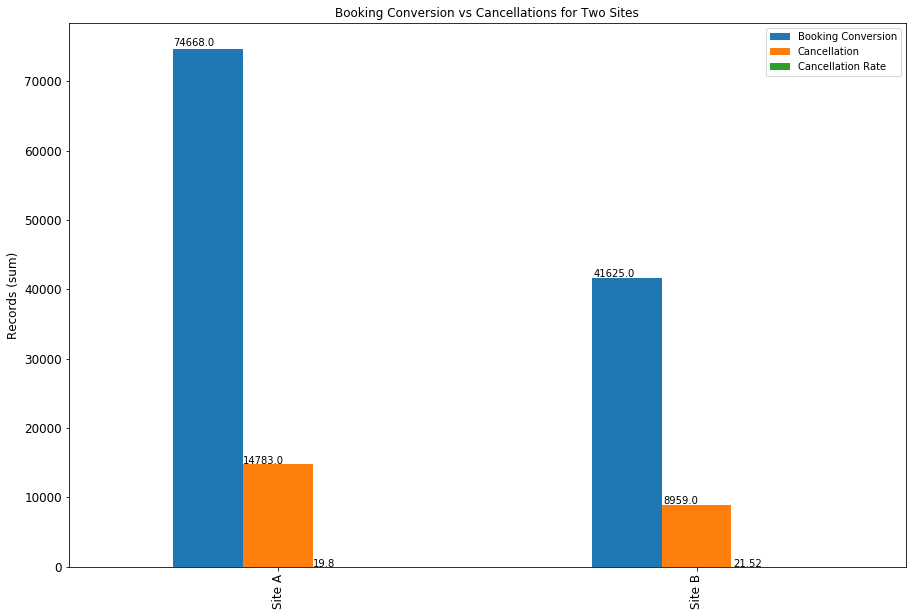

In [289]:
ax = data_cancellations[['Booking Conversion','Cancellation', 'Cancellation Rate']].plot(kind='bar', 
            title ="Booking Conversion vs Cancellations for Two Sites", figsize=(15, 10), legend=True, fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_ylabel("Records (sum)", fontsize=12)

plt.savefig('q2a1.png')

plt.show()

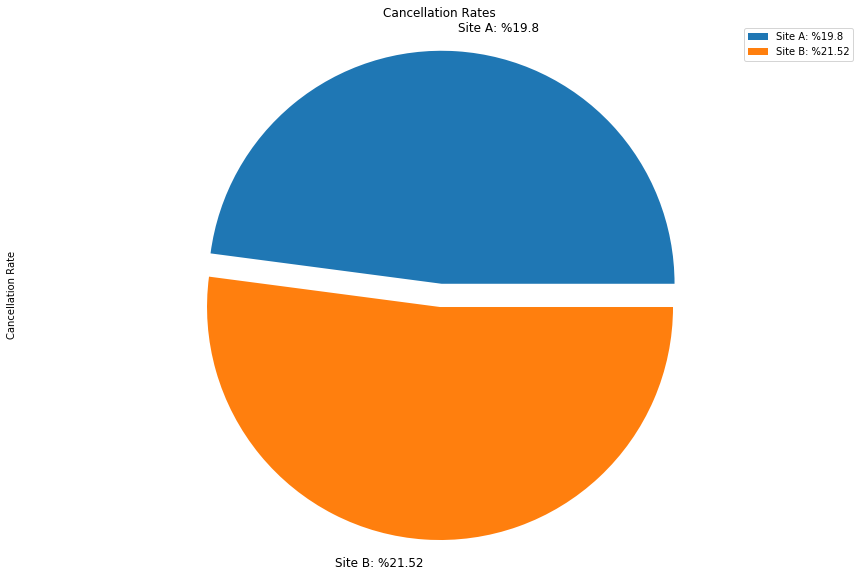

In [290]:
names = ['Site A: %19.8', 'Site B: %21.52']

explode  = (0, 0.1)
ax_pie = data_cancellations['Cancellation Rate'].plot(kind='pie', 
            title ="Cancellation Rates", 
                                       labels= names, figsize=(15, 10), explode=explode, legend=True, fontsize=12)
ax_pie.axis('equal')

plt.savefig('q2a1_percent.png')
plt.show()

## How did they change year-over-year?  


In [291]:
# 2016

site_A_cancellation_16 = data.loc[(data["Site"] == "Site A") &
                                            (data["Year of Date Id"] == 2016) &
                                            (data["Measure Names"] == "Total Cancellations")]

site_B_cancellation_16 = data.loc[(data["Site"] == "Site B") &
                                            (data["Year of Date Id"] == 2016) &
                                            (data["Measure Names"] == "Total Cancellations")]

site_A_booking_16 = data.loc[(data["Site"] == "Site A") &
                                            (data["Year of Date Id"] == 2016) &
                                            (data["Measure Names"] == "Total Net Bookings")]

site_B_booking_16 = data.loc[(data["Site"] == "Site B") &
                                            (data["Year of Date Id"] == 2016) &
                                            (data["Measure Names"] == "Total Net Bookings")]

# 2017

site_A_cancellation_17 = data.loc[(data["Site"] == "Site A") &
                                            (data["Year of Date Id"] == 2017) &
                                            (data["Measure Names"] == "Total Cancellations")]

site_B_cancellation_17 = data.loc[(data["Site"] == "Site B") &
                                            (data["Year of Date Id"] == 2017) &
                                            (data["Measure Names"] == "Total Cancellations")]

site_A_booking_17 = data.loc[(data["Site"] == "Site A") &
                                            (data["Year of Date Id"] == 2017) &
                                            (data["Measure Names"] == "Total Net Bookings")]

site_B_booking_17 = data.loc[(data["Site"] == "Site B") &
                                            (data["Year of Date Id"] == 2017) &
                                            (data["Measure Names"] == "Total Net Bookings")]

In [292]:
site_A_cancellation_16_sum = site_A_cancellation_16['Measure Values'].sum()
site_B_cancellation_16_sum = site_B_cancellation_16['Measure Values'].sum()

site_A_booking_16_sum = site_A_booking_16['Measure Values'].sum()
site_B_booking_16_sum = site_B_booking_16['Measure Values'].sum()

site_A_cancellation_17_sum = site_A_cancellation_17['Measure Values'].sum()
site_B_cancellation_17_sum = site_B_cancellation_17['Measure Values'].sum()

site_A_booking_17_sum = site_A_booking_17['Measure Values'].sum()
site_B_booking_17_sum = site_B_booking_17['Measure Values'].sum()

In [293]:
percent_site_A_16 = round((site_A_cancellation_16_sum/site_A_booking_16_sum)*100,2)
percent_site_A_17 = round((site_A_cancellation_17_sum/site_A_booking_17_sum)*100,2)

percent_site_B_16 = round((site_B_cancellation_16_sum/site_B_booking_16_sum)*100,2)
percent_site_B_17 = round((site_B_cancellation_17_sum/site_B_booking_17_sum)*100,2)

In [294]:
data_cancellations_years = pd.DataFrame(
        {'Cancellation': [site_A_cancellation_16_sum, site_A_cancellation_17_sum, site_B_cancellation_16_sum, site_B_cancellation_17_sum], 
         'Booking Conversion': [site_A_booking_16_sum, site_A_booking_17_sum, site_B_booking_16_sum, site_B_booking_17_sum],
        'Cancellation Rate': [percent_site_A_16, percent_site_A_17, percent_site_B_16, percent_site_B_17]}, 
            index=['Site A 2016', 'Site A 2017', 'Site B 2016', 'Site B 2017'])

In [295]:
data_cancellations_years

,Booking Conversion,Cancellation,Cancellation Rate
Site A 2016,28779.0,6337.0,22.02
Site A 2017,45889.0,8446.0,18.41
Site B 2016,21884.0,4288.0,19.59
Site B 2017,19741.0,4671.0,23.66


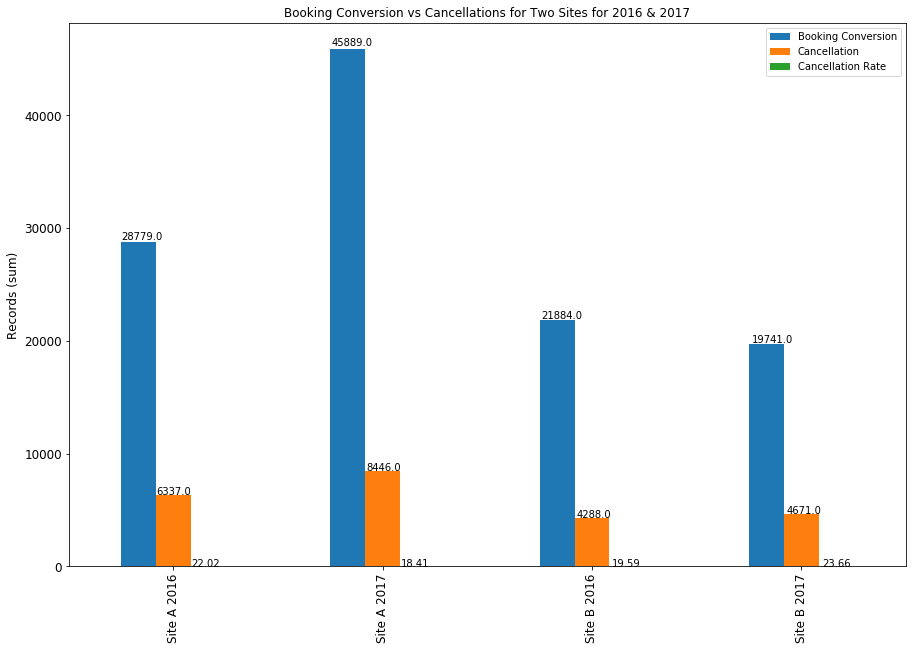

In [296]:
ax = data_cancellations_years[['Booking Conversion','Cancellation', 'Cancellation Rate']].plot(kind='bar', 
            title ="Booking Conversion vs Cancellations for Two Sites for 2016 & 2017", figsize=(15, 10), legend=True, fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_ylabel("Records (sum)", fontsize=12)

plt.savefig('q2a2.png')

plt.show()

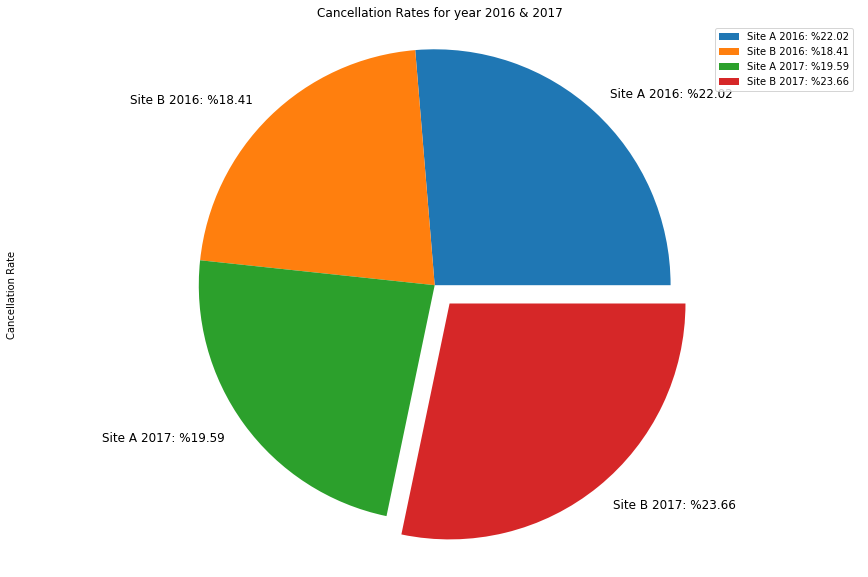

In [297]:
names = ['Site A 2016: %22.02', 'Site B 2016: %18.41', 'Site A 2017: %19.59', 'Site B 2017: %23.66']

explode  = (0, 0, 0, 0.1)
ax_pie = data_cancellations_years['Cancellation Rate'].plot(kind='pie', 
            title ="Cancellation Rates for year 2016 & 2017", 
            labels= names, figsize=(15, 10), explode=explode, legend=True, fontsize=12)
ax_pie.axis('equal')

plt.savefig('q2a2_percent.png')
plt.show()

## How does it compare between owner type and supplier type?

In [298]:
# FRBO

site_A_cancellation_frbo = data.loc[(data["Site"] == "Site A") &
                                            (data["Person Type"] == 'FRBO') &
                                            (data["Measure Names"] == "Total Cancellations")]

site_B_cancellation_frbo = data.loc[(data["Site"] == "Site B") &
                                            (data["Person Type"] == 'FRBO') &
                                            (data["Measure Names"] == "Total Cancellations")]

site_A_booking_frbo = data.loc[(data["Site"] == "Site A") &
                                            (data["Person Type"] == 'FRBO') &
                                            (data["Measure Names"] == "Total Net Bookings")]

site_B_booking_frbo = data.loc[(data["Site"] == "Site B") &
                                            (data["Person Type"] == 'FRBO') &
                                            (data["Measure Names"] == "Total Net Bookings")]

# PM

site_A_cancellation_pm = data.loc[(data["Site"] == "Site A") &
                                            (data["Person Type"] == 'PM') &
                                            (data["Measure Names"] == "Total Cancellations")]

site_B_cancellation_pm = data.loc[(data["Site"] == "Site B") &
                                            (data["Person Type"] == 'PM') &
                                            (data["Measure Names"] == "Total Cancellations")]

site_A_booking_pm = data.loc[(data["Site"] == "Site A") &
                                            (data["Person Type"] == 'PM') &
                                            (data["Measure Names"] == "Total Net Bookings")]

site_B_booking_pm = data.loc[(data["Site"] == "Site B") &
                                            (data["Person Type"] == 'PM') &
                                            (data["Measure Names"] == "Total Net Bookings")]

In [299]:
site_A_cancellation_frbo_sum = site_A_cancellation_frbo['Measure Values'].sum()
site_B_cancellation_frbo_sum = site_B_cancellation_frbo['Measure Values'].sum()

site_A_booking_frbo_sum = site_A_booking_frbo['Measure Values'].sum()
site_B_booking_frbo_sum = site_B_booking_frbo['Measure Values'].sum()

site_A_cancellation_pm_sum = site_A_cancellation_pm['Measure Values'].sum()
site_B_cancellation_pm_sum = site_B_cancellation_pm['Measure Values'].sum()

site_A_booking_pm_sum = site_A_booking_pm['Measure Values'].sum()
site_B_booking_pm_sum = site_B_booking_pm['Measure Values'].sum()

In [300]:
percent_site_A_frbo = round((site_A_cancellation_frbo_sum/site_A_booking_frbo_sum)*100,2)
percent_site_A_pm = round((site_A_cancellation_pm_sum/site_A_booking_pm_sum)*100,2)

percent_site_B_frbo = round((site_B_cancellation_frbo_sum/site_B_booking_frbo_sum)*100,2)
percent_site_B_pm = round((site_B_cancellation_pm_sum/site_B_booking_pm_sum)*100,2)

In [301]:
data_cancellations_person_types = pd.DataFrame(
        {'Cancellation': [site_A_cancellation_frbo_sum, site_A_cancellation_pm_sum, site_B_cancellation_frbo_sum, site_B_cancellation_pm_sum], 
         'Booking Conversion': [site_A_booking_frbo_sum, site_A_booking_pm_sum, site_B_booking_frbo_sum, site_B_booking_pm_sum],
        'Cancellation Rate': [percent_site_A_frbo, percent_site_A_pm, percent_site_B_frbo, percent_site_B_pm]}, 
            index=['Site A FRBO', 'Site A PM', 'Site B FRBO', 'Site B PM'])

In [302]:
data_cancellations_person_types

,Booking Conversion,Cancellation,Cancellation Rate
Site A FRBO,44368.0,5935.0,13.38
Site A PM,30300.0,8848.0,29.20
Site B FRBO,29869.0,4696.0,15.72
Site B PM,11756.0,4263.0,36.26


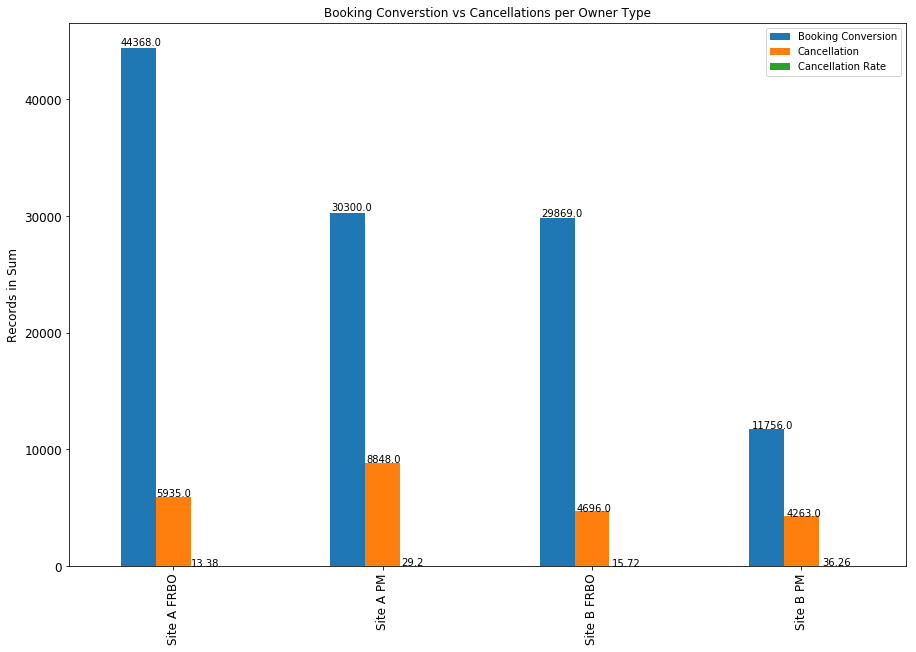

In [303]:
ax = data_cancellations_person_types[['Booking Conversion','Cancellation', 'Cancellation Rate']].plot(kind='bar', 
            title ="Booking Converstion vs Cancellations per Owner Type", figsize=(15, 10), legend=True, fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_ylabel("Records in Sum", fontsize=12)

plt.savefig('q2a3.png')

plt.show()

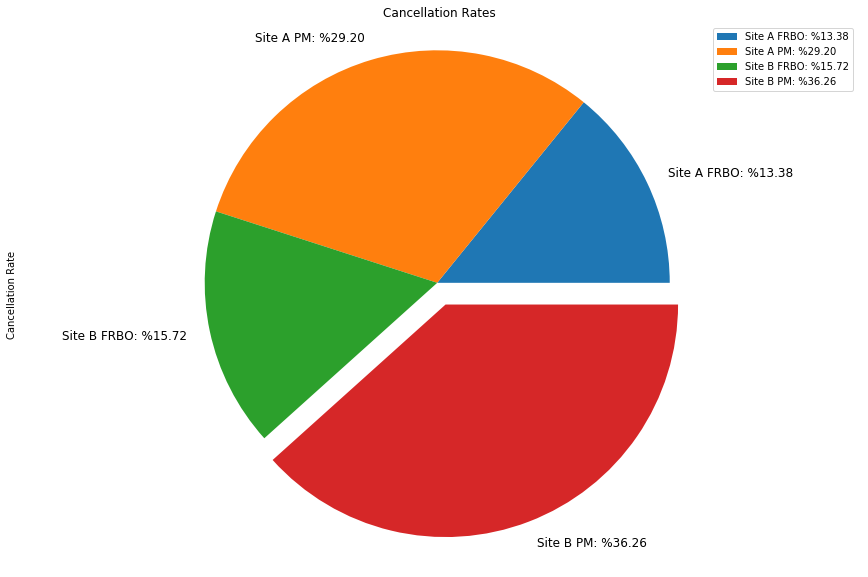

In [304]:
names = ['Site A FRBO: %13.38', 'Site A PM: %29.20', 'Site B FRBO: %15.72', 'Site B PM: %36.26']

explode  = (0, 0, 0, 0.1)
ax_pie = data_cancellations_person_types['Cancellation Rate'].plot(kind='pie', 
            title ="Cancellation Rates", 
                                       labels= names, figsize=(15, 10), explode=explode, legend=True, fontsize=12)
ax_pie.axis('equal')

plt.savefig('q2a3_percent.png')
plt.show()

In [305]:
# Platform

site_A_cancellation_platform = data.loc[(data["Site"] == "Site A") &
                                            (data["Supplier Type"] == "Platform") &
                                            (data["Measure Names"] == "Total Cancellations")]

site_B_cancellation_platform = data.loc[(data["Site"] == "Site B") &
                                            (data["Supplier Type"] == "Platform") &
                                            (data["Measure Names"] == "Total Cancellations")]

site_A_booking_platform = data.loc[(data["Site"] == "Site A") &
                                            (data["Supplier Type"] == "Platform") &
                                            (data["Measure Names"] == "Total Net Bookings")]

site_B_booking_platform = data.loc[(data["Site"] == "Site B") &
                                            (data["Supplier Type"] == "Platform") &
                                            (data["Measure Names"] == "Total Net Bookings")]

# Integrated

site_A_cancellation_integrated = data.loc[(data["Site"] == "Site A") &
                                            (data["Supplier Type"] == "Integrated") &
                                            (data["Measure Names"] == "Total Cancellations")]

site_B_cancellation_integrated = data.loc[(data["Site"] == "Site B") &
                                            (data["Supplier Type"] == "Integrated") &
                                            (data["Measure Names"] == "Total Cancellations")]

site_A_booking_integrated = data.loc[(data["Site"] == "Site A") &
                                            (data["Supplier Type"] == "Integrated") &
                                            (data["Measure Names"] == "Total Net Bookings")]

site_B_booking_integrated = data.loc[(data["Site"] == "Site B") &
                                            (data["Supplier Type"] == "Integrated") &
                                            (data["Measure Names"] == "Total Net Bookings")]

In [306]:
site_A_cancellation_platform_sum = site_A_cancellation_platform['Measure Values'].sum()
site_B_cancellation_platform_sum = site_B_cancellation_platform['Measure Values'].sum()

site_A_booking_platform_sum = site_A_booking_platform['Measure Values'].sum()
site_B_booking_platform_sum = site_B_booking_platform['Measure Values'].sum()

site_A_cancellation_integrated_sum = site_A_cancellation_integrated['Measure Values'].sum()
site_B_cancellation_integrated_sum = site_B_cancellation_integrated['Measure Values'].sum()

site_A_booking_integrated_sum = site_A_booking_integrated['Measure Values'].sum()
site_B_booking_integrated_sum = site_B_booking_integrated['Measure Values'].sum()

In [307]:
percent_site_A_platform = round((site_A_cancellation_platform_sum/site_A_booking_platform_sum)*100,2)
percent_site_B_platform = round((site_B_cancellation_platform_sum/site_B_booking_platform_sum)*100,2)


percent_site_A_integrated = round((site_A_cancellation_integrated_sum/site_A_booking_integrated_sum)*100,2)
percent_site_B_integrated = round((site_B_cancellation_integrated_sum/site_B_booking_integrated_sum)*100,2)

In [308]:
data_cancellation_supplier_type = pd.DataFrame(
        {'Cancellation': [site_A_cancellation_platform_sum, site_A_cancellation_integrated_sum, site_B_cancellation_platform_sum, site_B_cancellation_integrated_sum], 
         'Booking Conversion': [site_A_booking_platform_sum, site_A_booking_integrated_sum, site_B_booking_platform_sum, site_B_booking_integrated_sum],
        'Cancellation Rate': [percent_site_A_platform, percent_site_A_integrated, percent_site_B_platform, percent_site_B_integrated]}, 
            index=['Site A Platform', 'Site A Integrated', 'Site B Platform', 'Site B Integrated'])

In [309]:
data_cancellation_supplier_type

,Booking Conversion,Cancellation,Cancellation Rate
Site A Platform,64829.0,9240.0,14.25
Site A Integrated,9839.0,5543.0,56.34
Site B Platform,38011.0,6313.0,16.61
Site B Integrated,3614.0,2646.0,73.22


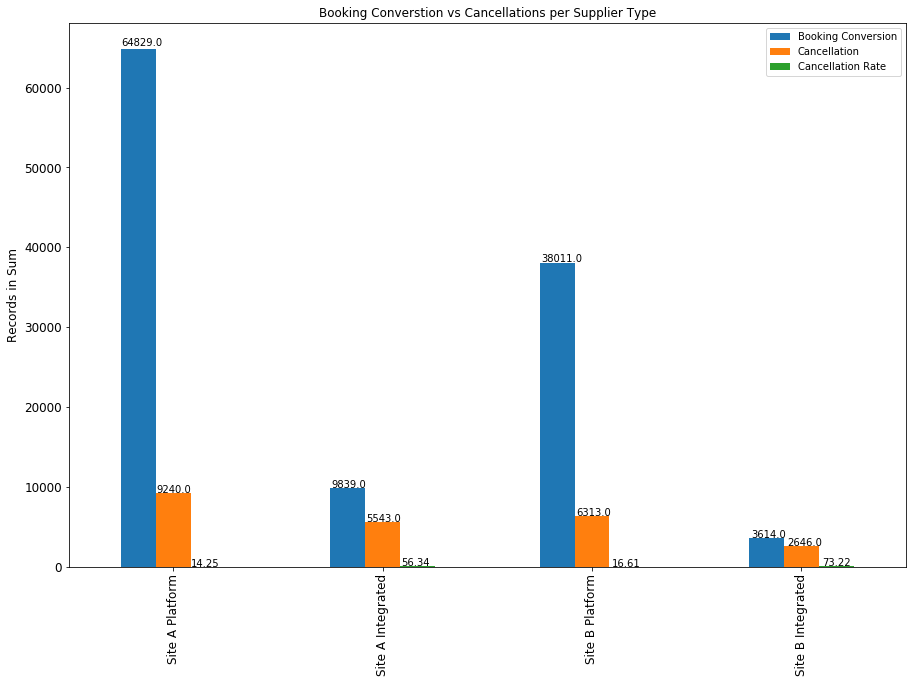

In [310]:
ax = data_cancellation_supplier_type[['Booking Conversion','Cancellation', 'Cancellation Rate']].plot(kind='bar', 
            title ="Booking Converstion vs Cancellations per Supplier Type", figsize=(15, 10), legend=True, fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_ylabel("Records in Sum", fontsize=12)

plt.savefig('q2a4.png')

plt.show()

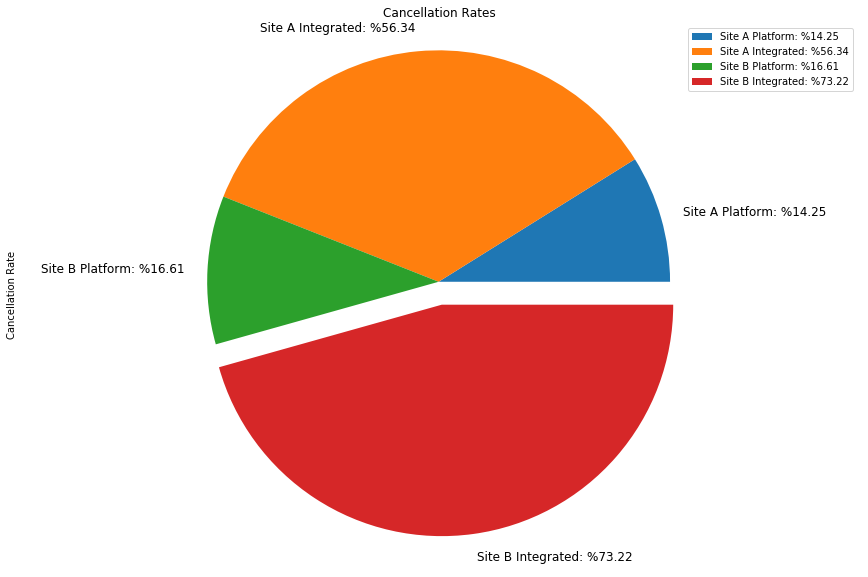

In [311]:
names = ['Site A Platform: %14.25', 'Site A Integrated: %56.34', 'Site B Platform: %16.61', 'Site B Integrated: %73.22']

explode  = (0, 0, 0, 0.1)
ax_pie = data_cancellation_supplier_type['Cancellation Rate'].plot(kind='pie', 
            title ="Cancellation Rates", 
            labels= names, figsize=(15, 10), explode=explode, legend=True, fontsize=12)
ax_pie.axis('equal')

plt.savefig('q2a4_percent.png')
plt.show()

1. What is the take rate for each brand and how does that compare year-over-year? 
2. How does it compare between owner type and supplier type?  
3. How could we go about increasing this percentage along with any potential risks to doing so?


In [312]:
data.head(1)

,Site,Month of Date Id,Day of Date Id,Year of Date Id,Measure Names,Person Type,Supplier Type,Measure Values
0,Site A,July,1,2016,Gross Booking Value,FRBO,Platform,248718.800525


## What is the take rate for each brand and how does that compare year-over-year? 

Take Rate = (Transactional Sales) / (Gross Booking Value)

In [313]:
for x in data_site_A['Measure Names'].unique():
    print(x)

Gross Booking Value
Inquiries
Property Detail Page Views
Total Cancellations
Total Gross Bookings
Total Net Bookings
Transactional Sales


In [314]:
data.head(1)

,Site,Month of Date Id,Day of Date Id,Year of Date Id,Measure Names,Person Type,Supplier Type,Measure Values
0,Site A,July,1,2016,Gross Booking Value,FRBO,Platform,248718.800525


In [315]:
#### 
# ONLY SITES 
#### 

site_A_trans_sales = data.loc[(data["Site"] == "Site A") & 
                                    (data["Measure Names"] == "Transactional Sales")]
site_A_gross_booking_value = data.loc[(data["Site"] == "Site A") & 
                                    (data["Measure Names"] == "Gross Booking Value")]

site_B_trans_sales = data.loc[(data["Site"] == "Site B") & 
                                    (data["Measure Names"] == "Transactional Sales")]
site_B_gross_booking_value = data.loc[(data["Site"] == "Site B") & 
                                    (data["Measure Names"] == "Gross Booking Value")]

In [316]:
site_A_trans_sales_sum = site_A_trans_sales['Measure Values'].sum()
site_A_gross_booking_value_sum = site_A_gross_booking_value['Measure Values'].sum()
take_rate_site_A = round((site_A_trans_sales_sum / site_A_gross_booking_value_sum)*100,2)


site_B_trans_sales_sum = site_B_trans_sales['Measure Values'].sum()
site_B_gross_booking_value_sum = site_B_gross_booking_value['Measure Values'].sum()
take_rate_site_B = round((site_B_trans_sales_sum / site_B_gross_booking_value_sum)*100,2)

In [317]:
take_rate_site_A_B = pd.DataFrame(
        {'Transactional Sales': [site_A_trans_sales_sum, site_B_trans_sales_sum],
         'Gross Booking Value': [site_A_gross_booking_value_sum, site_B_gross_booking_value_sum],
         'Take Rate': [take_rate_site_A, take_rate_site_B]}, 
            index=['Site A', 'Site B'])

take_rate_site_A_B

,Gross Booking Value,Take Rate,Transactional Sales
Site A,1.255122e+08,7.00,8.790230e+06
Site B,5.616656e+07,5.32,2.986087e+06


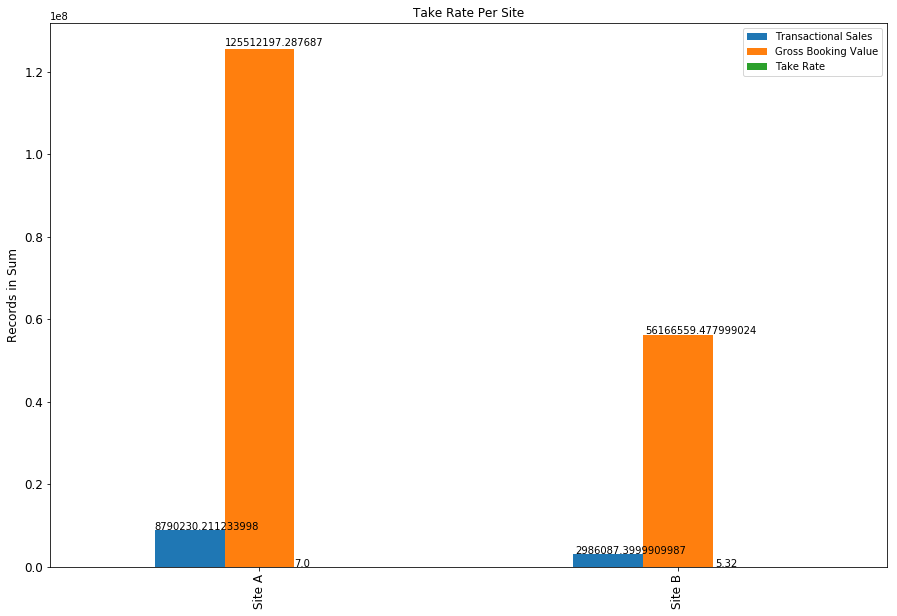

In [318]:
ax = take_rate_site_A_B[['Transactional Sales', 'Gross Booking Value','Take Rate']].plot(kind='bar', 
            title ="Take Rate Per Site", figsize=(15, 10), legend=True, fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_ylabel("Records in Sum", fontsize=12)

plt.savefig('q3a1.png')

plt.show()

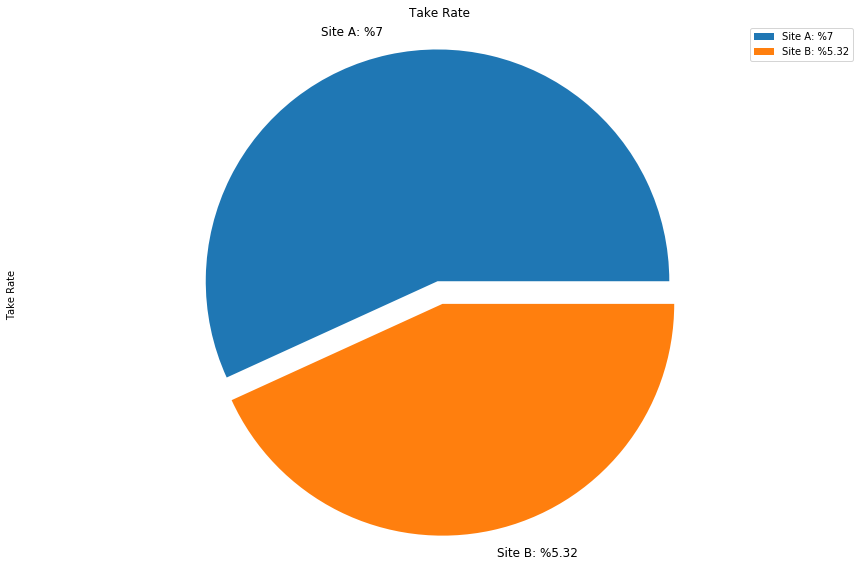

In [319]:
names = ['Site A: %7', 'Site B: %5.32']

explode  = (0.1, 0)
ax_pie = take_rate_site_A_B['Take Rate'].plot(kind='pie', 
            title ="Take Rate", 
            labels= names, figsize=(15, 10), explode=explode, legend=True, fontsize=12)
ax_pie.axis('equal')

plt.savefig('q3a1_percent.png')
plt.show()


In [338]:
####
# 2016
####


site_A_trans_sales_16 = data.loc[(data["Site"] == "Site A") & 
                                    (data["Year of Date Id"] == 2016) &
                                    (data["Measure Names"] == "Transactional Sales")]

site_A_gross_booking_value_16 = data.loc[(data["Site"] == "Site A") & 
                                    (data["Year of Date Id"] == 2016) &
                                    (data["Measure Names"] == "Gross Booking Value")]

site_B_trans_sales_16 = data.loc[(data["Site"] == "Site B") & 
                                    (data["Year of Date Id"] == 2016) &
                                    (data["Measure Names"] == "Transactional Sales")]

site_B_gross_booking_value_16 = data.loc[(data["Site"] == "Site B") & 
                                    (data["Year of Date Id"] == 2016) &
                                    (data["Measure Names"] == "Gross Booking Value")]





##### 
# 2017 
#####

site_A_trans_sales_17 = data.loc[(data["Site"] == "Site A") & 
                                    (data["Year of Date Id"] == 2017) &
                                    (data["Measure Names"] == "Transactional Sales")]

site_A_gross_booking_value_17 = data.loc[(data["Site"] == "Site A") & 
                                    (data["Year of Date Id"] == 2017) &
                                    (data["Measure Names"] == "Gross Booking Value")]

site_B_trans_sales_17 = data.loc[(data["Site"] == "Site B") & 
                                    (data["Year of Date Id"] == 2017) &
                                    (data["Measure Names"] == "Transactional Sales")]

site_B_gross_booking_value_17 = data.loc[(data["Site"] == "Site B") & 
                                    (data["Year of Date Id"] == 2017) &
                                    (data["Measure Names"] == "Gross Booking Value")]

In [346]:
site_A_trans_sales_16_sum = site_A_trans_sales_16['Measure Values'].sum()
site_A_gross_booking_value_16_sum = site_A_gross_booking_value_16['Measure Values'].sum()

site_B_trans_sales_16_sum = site_B_trans_sales_16['Measure Values'].sum()
site_B_gross_booking_value_16_sum = site_B_gross_booking_value_16['Measure Values'].sum()

In [345]:
site_A_trans_sales_17_sum = site_A_trans_sales_17['Measure Values'].sum()
site_A_gross_booking_value_17_sum = site_A_gross_booking_value_17['Measure Values'].sum()

site_B_trans_sales_17_sum = site_B_trans_sales_17['Measure Values'].sum()
site_B_gross_booking_value_17_sum = site_B_gross_booking_value_17['Measure Values'].sum()

In [347]:
take_rate_site_A_16 = round((site_A_trans_sales_16_sum/site_A_gross_booking_value_16_sum)*100,2)
take_rate_site_B_16 = round((site_B_trans_sales_16_sum/site_B_gross_booking_value_16_sum)*100,2)

take_rate_site_A_17 = round((site_A_trans_sales_17_sum/site_A_gross_booking_value_17_sum)*100,2)
take_rate_site_B_17 = round((site_B_trans_sales_17_sum/site_B_gross_booking_value_17_sum)*100,2)

In [358]:
take_rate_site_A_B_years = pd.DataFrame(
        { 'Transactional Sales': [site_A_trans_sales_16_sum, site_A_trans_sales_17_sum, site_B_trans_sales_16_sum, site_B_trans_sales_17_sum],
            'Gross Booking Value': [site_A_gross_booking_value_16_sum, site_A_gross_booking_value_17_sum, site_B_gross_booking_value_16_sum, site_B_gross_booking_value_17_sum],
            'Take Rate': [take_rate_site_A_16, take_rate_site_A_17, take_rate_site_B_16, take_rate_site_B_17]}, 
            index=['Site A 2016', 'Site A 2017', 'Site B 2016', 'Site B 2017'])

take_rate_site_A_B_years

,Gross Booking Value,Take Rate,Transactional Sales
Site A 2016,4.809658e+07,5.12,2.463751e+06
Site A 2017,7.741562e+07,8.17,6.326479e+06
Site B 2016,2.737134e+07,3.25,8.908585e+05
Site B 2017,2.879522e+07,7.28,2.095229e+06


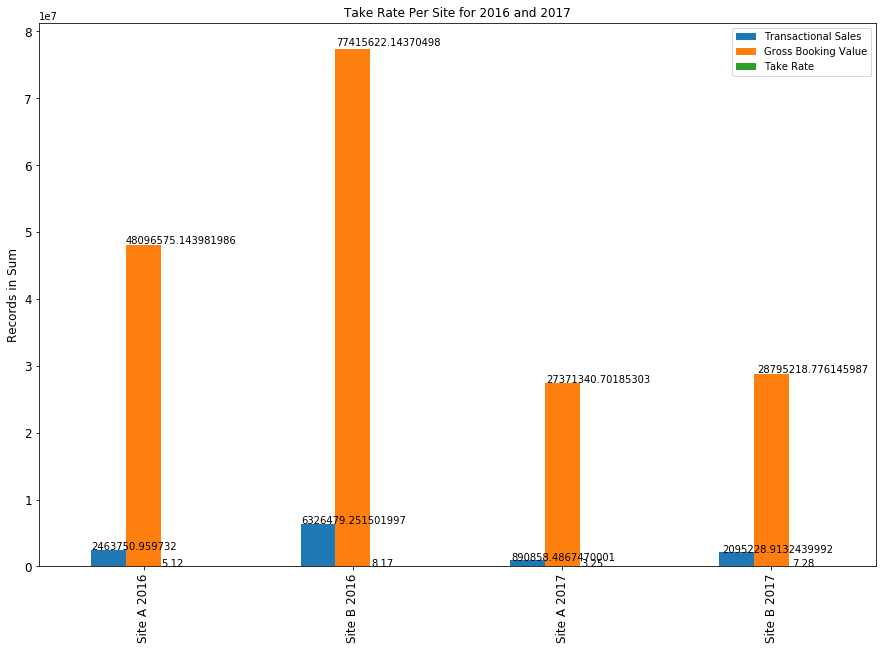

In [350]:
ax = take_rate_site_A_B_years[['Transactional Sales', 'Gross Booking Value','Take Rate']].plot(kind='bar', 
            title ="Take Rate Per Site for 2016 and 2017", figsize=(15, 10), legend=True, fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_ylabel("Records in Sum", fontsize=12)

plt.savefig('q3a2.png')

plt.show()

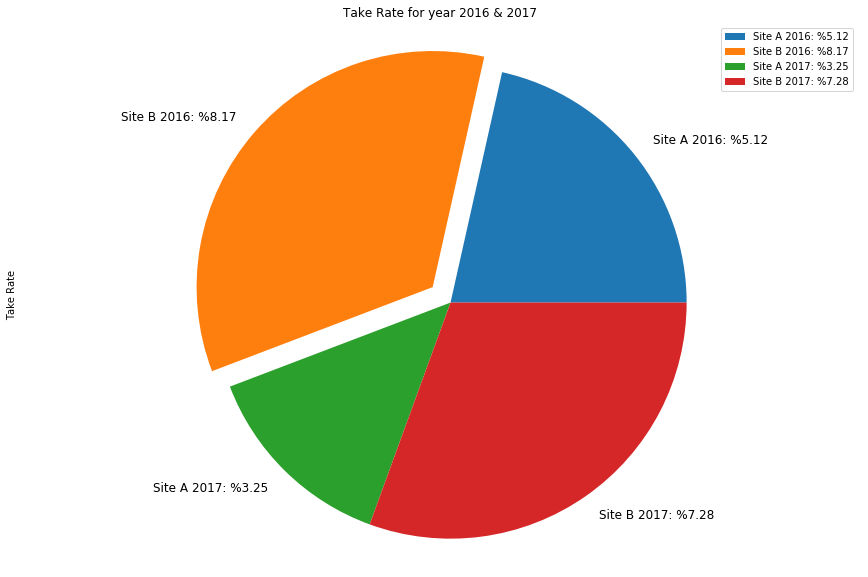

In [351]:
names = ['Site A 2016: %5.12', 'Site B 2016: %8.17', 'Site A 2017: %3.25', 'Site B 2017: %7.28']

explode  = (0, 0.1, 0, 0)
ax_pie = take_rate_site_A_B_years['Take Rate'].plot(kind='pie', 
            title ="Take Rate for year 2016 & 2017", 
            labels= names, figsize=(15, 10), explode=explode, legend=True, fontsize=12)
ax_pie.axis('equal')

plt.savefig('q3a2_percent.png')
plt.show()

## How does it compare between owner type and supplier type? 

In [354]:
####
# FRBO
####


site_A_trans_sales_frbo = data.loc[(data["Site"] == "Site A") & 
                                    (data["Person Type"] == 'FRBO') &
                                    (data["Measure Names"] == "Transactional Sales")]

site_A_gross_booking_value_frbo = data.loc[(data["Site"] == "Site A") & 
                                    (data["Person Type"] == 'FRBO') &
                                    (data["Measure Names"] == "Gross Booking Value")]

site_B_trans_sales_frbo = data.loc[(data["Site"] == "Site B") & 
                                    (data["Person Type"] == 'FRBO') &
                                    (data["Measure Names"] == "Transactional Sales")]

site_B_gross_booking_value_frbo = data.loc[(data["Site"] == "Site B") & 
                                    (data["Person Type"] == 'FRBO') &
                                    (data["Measure Names"] == "Gross Booking Value")]


####
# PM
####


site_A_trans_sales_pm = data.loc[(data["Site"] == "Site A") & 
                                    (data["Person Type"] == 'PM') &
                                    (data["Measure Names"] == "Transactional Sales")]

site_A_gross_booking_value_pm = data.loc[(data["Site"] == "Site A") & 
                                    (data["Person Type"] == 'PM') &
                                    (data["Measure Names"] == "Gross Booking Value")]

site_B_trans_sales_pm = data.loc[(data["Site"] == "Site B") & 
                                    (data["Person Type"] == 'PM') &
                                    (data["Measure Names"] == "Transactional Sales")]

site_B_gross_booking_value_pm = data.loc[(data["Site"] == "Site B") & 
                                    (data["Person Type"] == 'PM') &
                                    (data["Measure Names"] == "Gross Booking Value")]

In [355]:
site_A_trans_sales_frbo_sum = site_A_trans_sales_frbo['Measure Values'].sum()
site_A_gross_booking_value_frbo_sum = site_A_gross_booking_value_frbo['Measure Values'].sum()

site_B_trans_sales_frbo_sum = site_B_trans_sales_frbo['Measure Values'].sum()
site_B_gross_booking_value_frbo_sum = site_B_gross_booking_value_frbo['Measure Values'].sum()

In [356]:
site_A_trans_sales_pm_sum = site_A_trans_sales_pm['Measure Values'].sum()
site_A_gross_booking_value_pm_sum = site_A_gross_booking_value_pm['Measure Values'].sum()

site_B_trans_sales_pm_sum = site_B_trans_sales_pm['Measure Values'].sum()
site_B_gross_booking_value_pm_sum = site_B_gross_booking_value_pm['Measure Values'].sum()

In [357]:
take_rate_site_A_frbo = round((site_A_trans_sales_frbo_sum/site_A_gross_booking_value_frbo_sum)*100,2)
take_rate_site_B_frbo = round((site_B_trans_sales_frbo_sum/site_B_gross_booking_value_frbo_sum)*100,2)

take_rate_site_A_pm = round((site_A_trans_sales_pm_sum/site_A_gross_booking_value_pm_sum)*100,2)
take_rate_site_B_pm = round((site_B_trans_sales_pm_sum/site_B_gross_booking_value_pm_sum)*100,2)

In [359]:
take_rate_site_A_B_person_types = pd.DataFrame(
        { 'Transactional Sales': [site_A_trans_sales_frbo_sum, site_A_trans_sales_pm_sum, site_B_trans_sales_frbo_sum, site_B_trans_sales_pm_sum],
            'Gross Booking Value': [site_A_gross_booking_value_frbo_sum, site_A_gross_booking_value_pm_sum, site_B_gross_booking_value_frbo_sum, site_B_gross_booking_value_pm_sum],
            'Take Rate': [take_rate_site_A_frbo, take_rate_site_A_pm, take_rate_site_B_frbo, take_rate_site_B_pm]}, 
            index=['Site A FRBO', 'Site A PM', 'Site B FRBO', 'Site B PM'])

take_rate_site_A_B_person_types

,Gross Booking Value,Take Rate,Transactional Sales
Site A FRBO,6.583963e+07,6.24,4.111146e+06
Site A PM,5.967257e+07,7.84,4.679085e+06
Site B FRBO,3.694158e+07,6.03,2.229243e+06
Site B PM,1.922498e+07,3.94,7.568449e+05


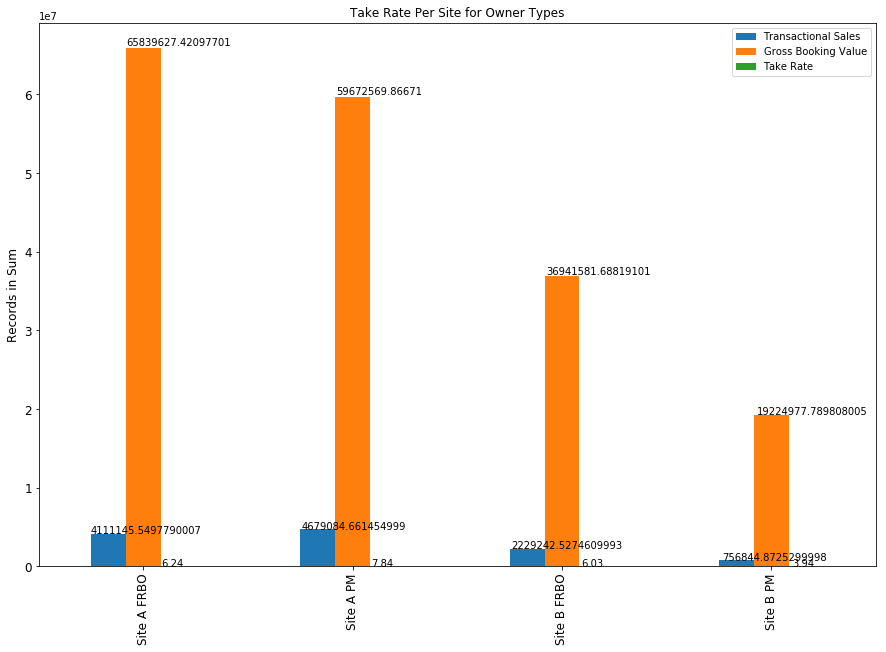

In [360]:
ax = take_rate_site_A_B_person_types[['Transactional Sales', 'Gross Booking Value','Take Rate']].plot(kind='bar', 
            title ="Take Rate Per Site for Owner Types", figsize=(15, 10), legend=True, fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_ylabel("Records in Sum", fontsize=12)

plt.savefig('q3a3.png')

plt.show()

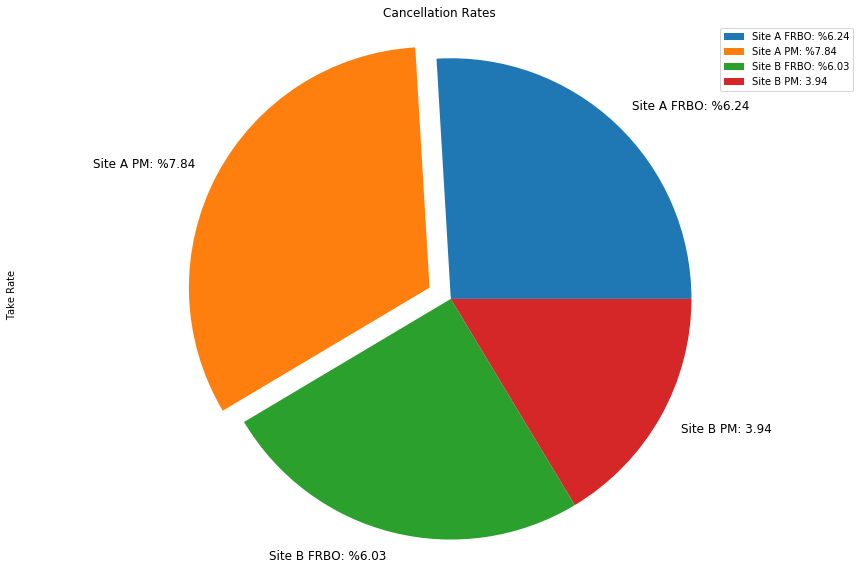

In [362]:
names = ['Site A FRBO: %6.24', 'Site A PM: %7.84', 'Site B FRBO: %6.03', 'Site B PM: 3.94']

explode  = (0, 0.1, 0, 0)
ax_pie = take_rate_site_A_B_person_types['Take Rate'].plot(kind='pie', 
            title ="Cancellation Rates", 
            labels= names, figsize=(15, 10), explode=explode, legend=True, fontsize=12)
ax_pie.axis('equal')

plt.savefig('q3a3_percent.png')
plt.show()

In [364]:
####
# Platfrom
####


site_A_trans_sales_plat = data.loc[(data["Site"] == "Site A") & 
                                    (data["Supplier Type"] == 'Platform') &
                                    (data["Measure Names"] == "Transactional Sales")]

site_A_gross_booking_value_plat = data.loc[(data["Site"] == "Site A") & 
                                    (data["Supplier Type"] == 'Platform') &
                                    (data["Measure Names"] == "Gross Booking Value")]

site_B_trans_sales_plat = data.loc[(data["Site"] == "Site B") & 
                                    (data["Supplier Type"] == 'Platform') &
                                    (data["Measure Names"] == "Transactional Sales")]

site_B_gross_booking_value_plat = data.loc[(data["Site"] == "Site B") & 
                                    (data["Supplier Type"] == 'Platform') &
                                    (data["Measure Names"] == "Gross Booking Value")]


####
# Integrated
####


site_A_trans_sales_int = data.loc[(data["Site"] == "Site A") & 
                                    (data["Supplier Type"] == 'Integrated') &
                                    (data["Measure Names"] == "Transactional Sales")]

site_A_gross_booking_value_int = data.loc[(data["Site"] == "Site A") & 
                                    (data["Supplier Type"] == 'Integrated') &
                                    (data["Measure Names"] == "Gross Booking Value")]

site_B_trans_sales_int = data.loc[(data["Site"] == "Site B") & 
                                    (data["Supplier Type"] == 'Integrated') &
                                    (data["Measure Names"] == "Transactional Sales")]

site_B_gross_booking_value_int = data.loc[(data["Site"] == "Site B") & 
                                    (data["Supplier Type"] == 'Integrated') &
                                    (data["Measure Names"] == "Gross Booking Value")]

In [365]:
site_A_trans_sales_plat_sum = site_A_trans_sales_plat['Measure Values'].sum()
site_A_gross_booking_value_plat_sum = site_A_gross_booking_value_plat['Measure Values'].sum()

site_B_trans_sales_plat_sum = site_B_trans_sales_plat['Measure Values'].sum()
site_B_gross_booking_value_plat_sum = site_B_gross_booking_value_plat['Measure Values'].sum()

In [366]:
site_A_trans_sales_int_sum = site_A_trans_sales_int['Measure Values'].sum()
site_A_gross_booking_value_int_sum = site_A_gross_booking_value_int['Measure Values'].sum()

site_B_trans_sales_int_sum = site_B_trans_sales_int['Measure Values'].sum()
site_B_gross_booking_value_int_sum = site_B_gross_booking_value_int['Measure Values'].sum()

In [367]:
take_rate_site_A_plat = round((site_A_trans_sales_plat_sum/site_A_gross_booking_value_plat_sum)*100,2)
take_rate_site_B_plat = round((site_B_trans_sales_plat_sum/site_B_gross_booking_value_plat_sum)*100,2)

take_rate_site_A_int = round((site_A_trans_sales_int_sum/site_A_gross_booking_value_int_sum)*100,2)
take_rate_site_B_int = round((site_B_trans_sales_int_sum/site_B_gross_booking_value_int_sum)*100,2)

In [368]:
take_rate_site_A_B_supplier_types = pd.DataFrame(
        { 'Transactional Sales': [site_A_trans_sales_plat_sum, site_A_trans_sales_int_sum, site_B_trans_sales_plat_sum, site_B_trans_sales_int_sum],
            'Gross Booking Value': [site_A_gross_booking_value_plat_sum, site_A_gross_booking_value_int_sum, site_B_gross_booking_value_plat_sum, site_B_gross_booking_value_int_sum],
            'Take Rate': [take_rate_site_A_plat, take_rate_site_A_int, take_rate_site_B_plat, take_rate_site_B_int]}, 
            index=['Site A Platform', 'Site A Integrated', 'Site B Platform', 'Site B Integrated'])

take_rate_site_A_B_supplier_types

,Gross Booking Value,Take Rate,Transactional Sales
Site A Platform,1.038449e+08,6.32,6.564439e+06
Site A Integrated,2.166730e+07,10.27,2.225792e+06
Site B Platform,4.868253e+07,5.84,2.842072e+06
Site B Integrated,7.484027e+06,1.92,1.440149e+05


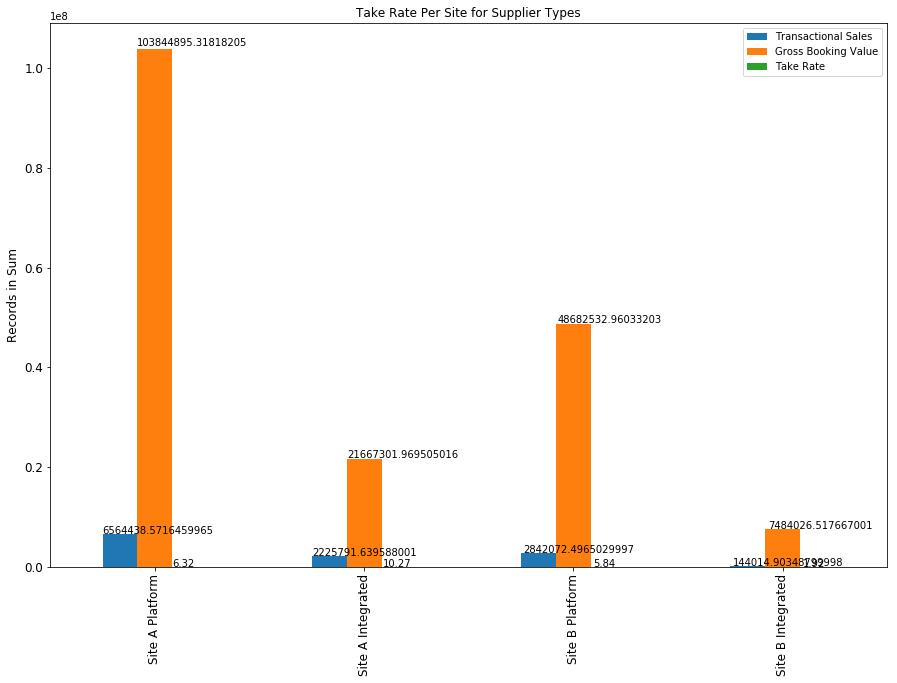

In [369]:
ax = take_rate_site_A_B_supplier_types[['Transactional Sales', 'Gross Booking Value','Take Rate']].plot(kind='bar', 
            title ="Take Rate Per Site for Supplier Types", figsize=(15, 10), legend=True, fontsize=12)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_ylabel("Records in Sum", fontsize=12)

plt.savefig('q3a4.png')

plt.show()

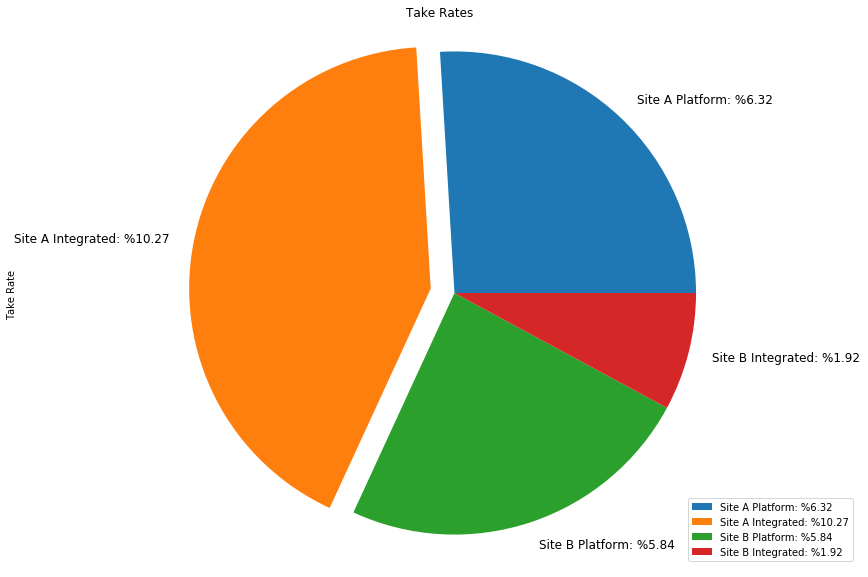

In [371]:
names = ['Site A Platform: %6.32', 'Site A Integrated: %10.27', 'Site B Platform: %5.84', 'Site B Integrated: %1.92']

explode  = (0, 0.1, 0, 0)
ax_pie = take_rate_site_A_B_supplier_types['Take Rate'].plot(kind='pie', 
            title ="Take Rates", 
            labels= names, figsize=(15, 10), explode=explode, legend=True, fontsize=12)
ax_pie.axis('equal')

plt.savefig('q3a4_percent.png')
plt.show()